In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

#import geopy
#import usaddress
#import reverse_geocoder as rg 
#import pprint 

In [2]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Formatting

Only used during first loading of data to make the raw data more user-friendly

In [3]:
#data['Call Received'] = pd.to_datetime(data['Call Received'])

In [4]:
#data.info()

In [5]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc'}, axis=1)

In [6]:
#data['month'] = pd.DatetimeIndex(data['call_re']).month
#data['day'] = pd.DatetimeIndex(data['call_re']).day

In [7]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc','geometry':'geo','index_right':'ind_r'}, axis=1)

In [8]:
# Create column to identify if incident location is in TN

#outers = [34.153, 0, -2.283]
#data['in_state'] = np.where(data.lat.isin(outers), False, True)

# Note: Loading raw data for 2013 - 2017 shows three popular locations recorded that are outside of TN with unique latitudes listed in the outers array.

In [9]:
#to avoid having to recreate and reload info
#data = data.to_csv('./data/df_2013_formatted_with_zip.csv', index = False)

## Load Formatted Crime Data

In [10]:
data = pd.read_csv('./data/df_2014_formatted_with_zip.csv')

In [11]:
data.shape

(1193159, 24)

In [12]:
data.head()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry
0,0.0,37115.0,PD201400483111,2014-05-08 12:28:00,20140438425,A,43,Want Officer for Investigation / Assistance,P,PROGRESS,4,ASSISTED CITIZEN,0,KEMPER DR S / TUCKAHOE DR,7F74,M,23.0,2039,36.263,-86.751,"(36.263, -86.751)",5,8,POINT (-86.751 36.26300000000001)
1,0.0,37115.0,PD201401005987,2014-09-28 14:25:00,20140900565,A,49,Vehicle Blocking Right of Way,P,PROGRESS,4,ASSISTED CITIZEN,300,KEMPER DR S,725B,M,25.0,2019,36.263,-86.751,"(36.263, -86.751)",9,28,POINT (-86.751 36.26300000000001)
2,0.0,37115.0,PD201401083725,2014-10-20 07:58:00,20140969318,A,65,Dangerous / Injured Animal,P,PROGRESS,4,ASSISTED CITIZEN,0,TUCKAHOE DR / KEMPER DR S,720A,M,25.0,2039,36.263,-86.751,"(36.263, -86.751)",10,20,POINT (-86.751 36.26300000000001)
3,0.0,37115.0,PD201400997133,2014-09-25 22:28:00,20140892933,B,43,Want Officer for Investigation / Assistance,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,4,ASSISTED CITIZEN,300,KEMPER DR S,7T83,M,25.0,2019,36.263,-86.751,"(36.263, -86.751)",9,25,POINT (-86.751 36.26300000000001)
4,0.0,37115.0,PD201401050194,2014-10-10 16:47:00,20140939670,B,40,Suspicious Person,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,6,ASSISTED OTHER UNIT,0,KEMPER DR S / TUCKAHOE DR,725B,M,25.0,2039,36.263,-86.751,"(36.263, -86.751)",10,10,POINT (-86.751 36.26300000000001)


In [13]:
data.tail()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry
1193154,NaN,NaN,PD201401343424,2014-12-31 17:55:00,20141200864,B,96,Business Check,NaN,NaN,4,ASSISTED CITIZEN,900,JEFFERSON ST,415B,NaN,NaN,0,NaN,NaN,NaN,12,31,POINT (nan nan)
1193155,NaN,NaN,PD201401343635,2014-12-31 19:00:00,20141201053,B,3,Administrative/Special Assignment,O,OTHER (USED BY MNPD),4,ASSISTED CITIZEN,0,ENFORCEMENT,3T74,NaN,NaN,0,NaN,NaN,NaN,12,31,POINT (nan nan)
1193156,NaN,NaN,PD201401343821,2014-12-31 19:59:00,20141201221,B,96,Business Check,NaN,NaN,15,COMMUNITY POLICING,5200,EDMONSON,8F71,NaN,NaN,0,NaN,NaN,NaN,12,31,POINT (nan nan)
1193157,NaN,NaN,PD201401344007,2014-12-31 20:59:00,20141201396,B,15,Community Policing Activity,P,PROGRESS,15,COMMUNITY POLICING,0,TIMOTHY PARK,2943,NaN,NaN,0,NaN,NaN,NaN,12,31,POINT (nan nan)
1193158,NaN,NaN,PD201401344425,2014-12-31 23:16:00,20141201743,NaN,40,Suspicious Person,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,9,SUBJECT WARNED,0,N 3RD ST/GRACE ST,222C,NaN,NaN,0,NaN,NaN,NaN,12,31,POINT (nan nan)


In [14]:
data['call_re'] = pd.to_datetime(data['call_re'])

## Dataframe Info

In [15]:
#data['tc_desc'].value_counts()

In [16]:
#data.info

# Worst Days & Weeks

## Incidents by Day

Text(0, 0.5, 'Number of Incidents')

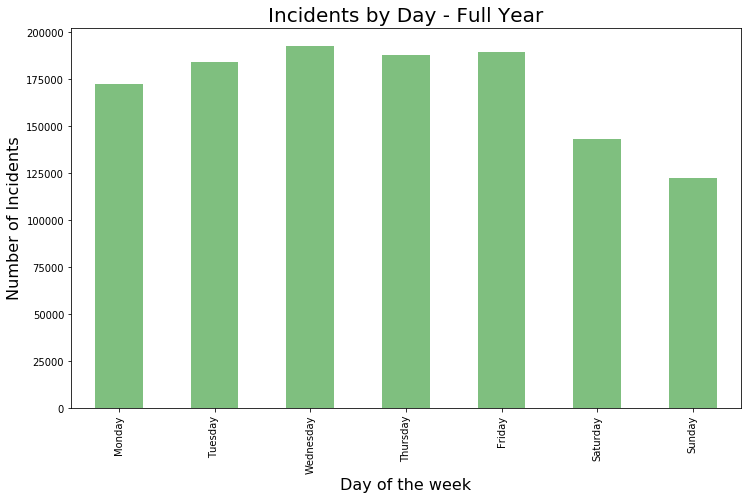

In [17]:
# Number of incidents per day of the week
day_incidents1 = data.groupby(data['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents1.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img1 = day_incidents1.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# title and x,y labels
plt.title('Incidents by Day - Full Year', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Day per Month

Text(0, 0.5, 'Number of Incidents')

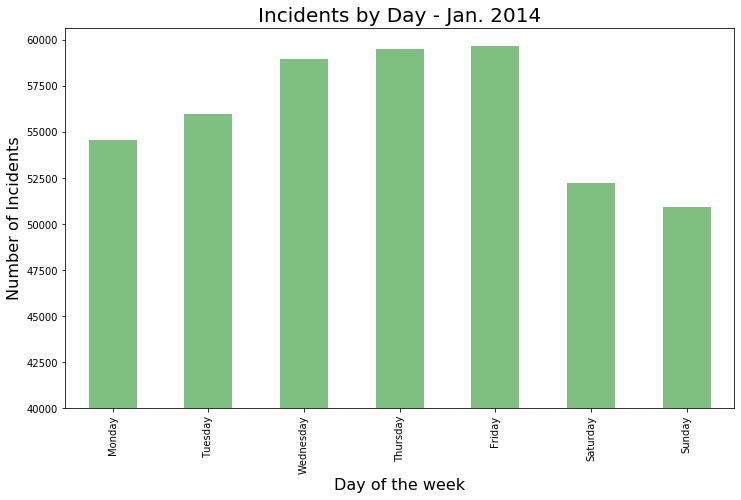

In [18]:
jan = data[data.month == 1]

# Number of incidents per day of the week
day_incidents = jan.groupby(jan['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jan. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

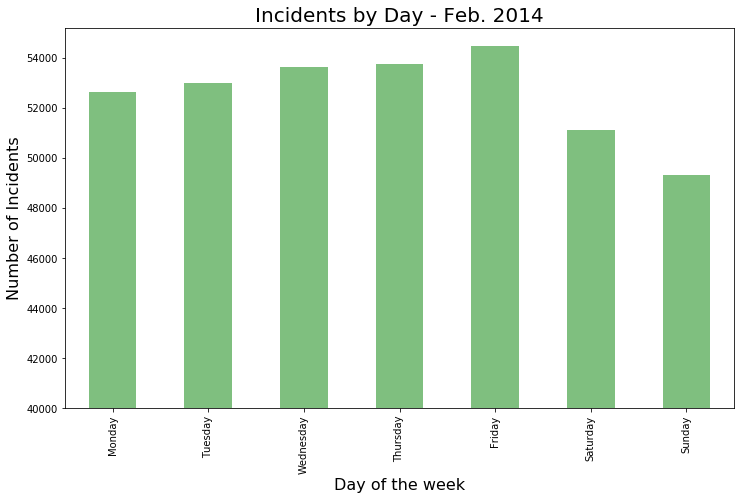

In [19]:
feb = data[data.month == 2]

# Number of incidents per day of the week
day_incidents = feb.groupby(feb['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Feb. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

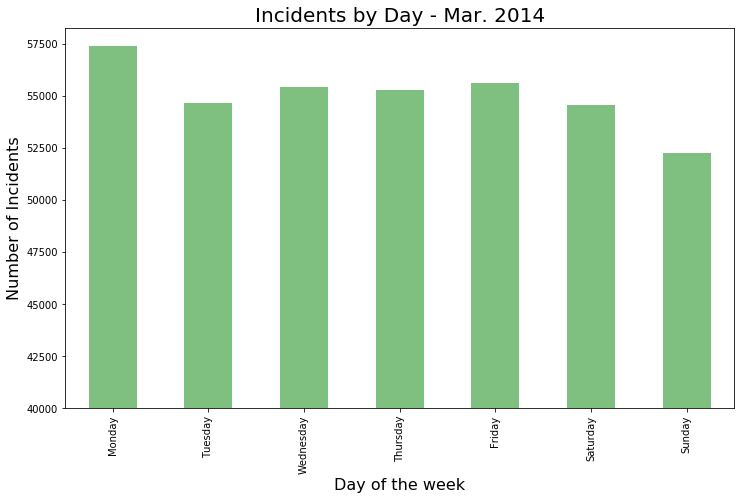

In [20]:
mar = data[data.month == 3]

# Number of incidents per day of the week
day_incidents = mar.groupby(mar['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Mar. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

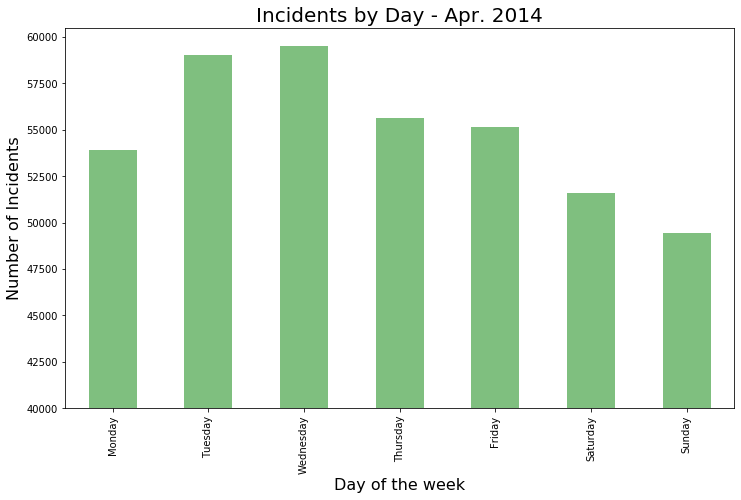

In [21]:
apr = data[data.month == 4]

# Number of incidents per day of the week
day_incidents = apr.groupby(apr['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Apr. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

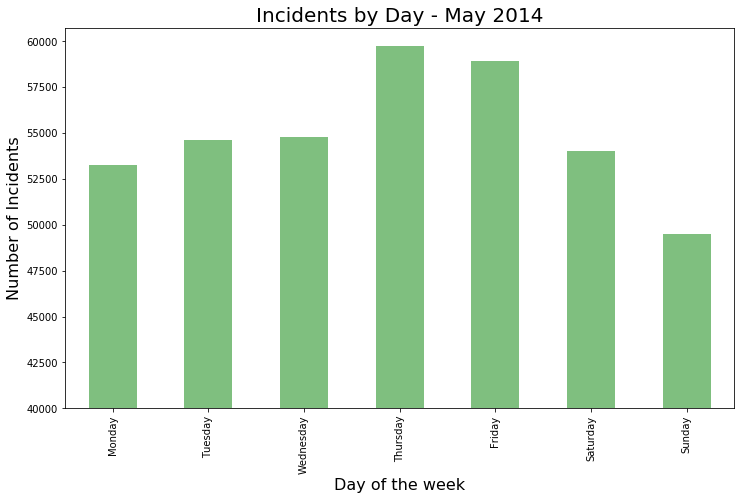

In [22]:
may = data[data.month == 5]

# Number of incidents per day of the week
day_incidents = may.groupby(may['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - May 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

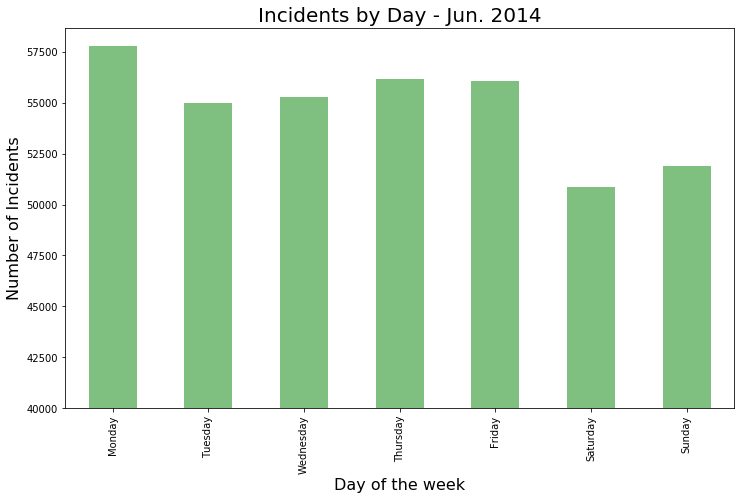

In [23]:
jun = data[data.month == 6]

# Number of incidents per day of the week
day_incidents = jun.groupby(jun['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jun. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

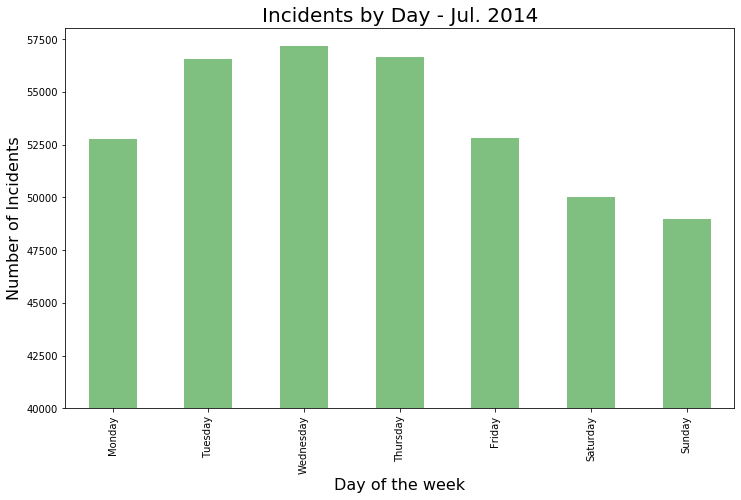

In [24]:
jul = data[data.month == 7]

# Number of incidents per day of the week
day_incidents = jul.groupby(jul['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jul. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

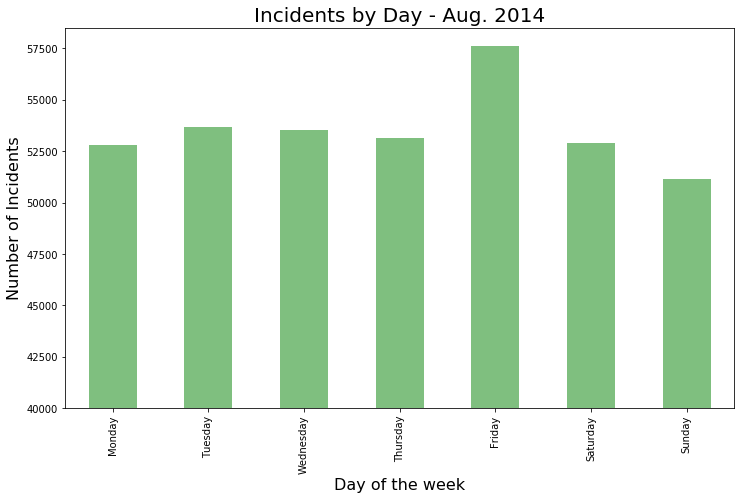

In [25]:
aug = data[data.month == 8]

# Number of incidents per day of the week
day_incidents = aug.groupby(aug['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Aug. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

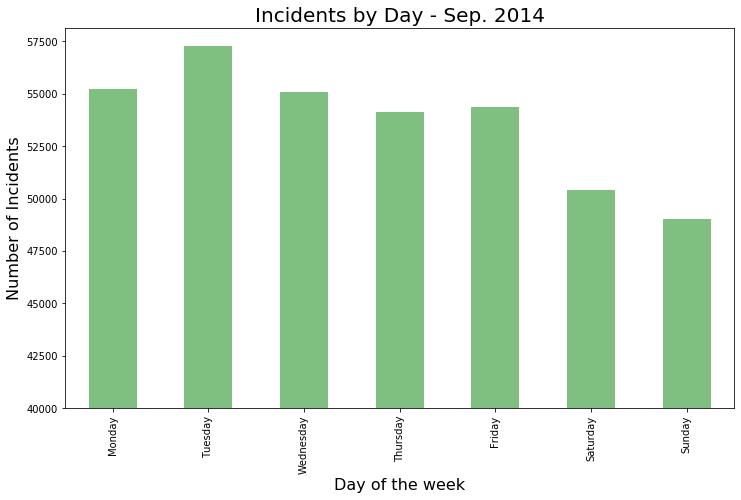

In [26]:
sep = data[data.month == 9]

# Number of incidents per day of the week
day_incidents = sep.groupby(sep['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Sep. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

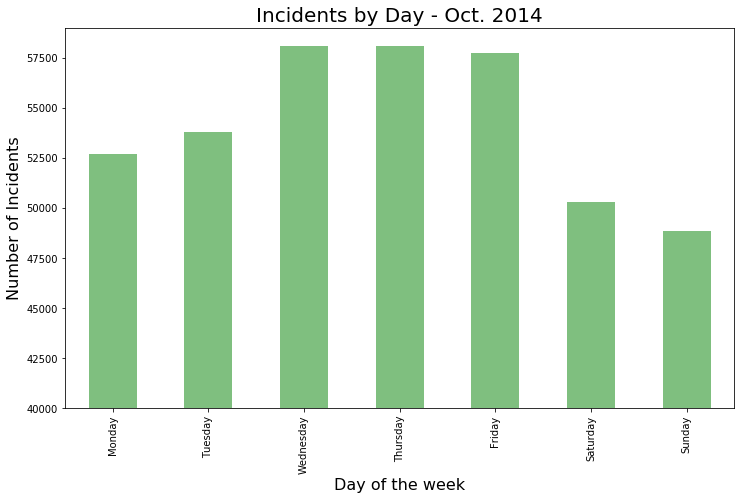

In [27]:
octo = data[data.month == 10]

# Number of incidents per day of the week
day_incidents = octo.groupby(octo['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Oct. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

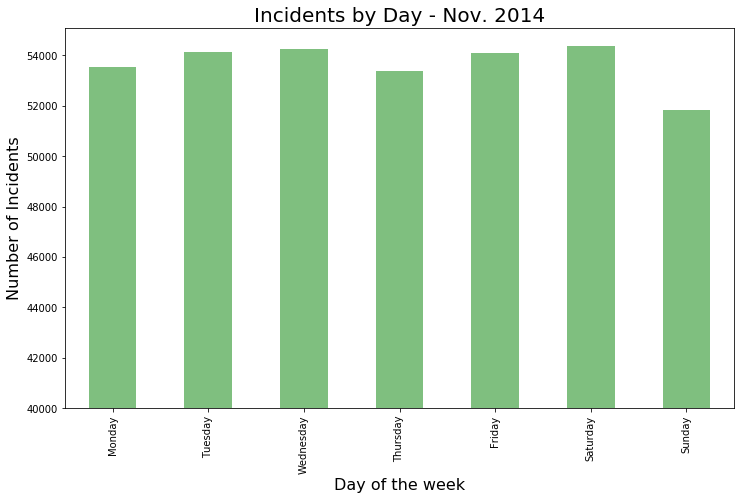

In [28]:
nov = data[data.month == 11]

# Number of incidents per day of the week
day_incidents = nov.groupby(nov['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Nov. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

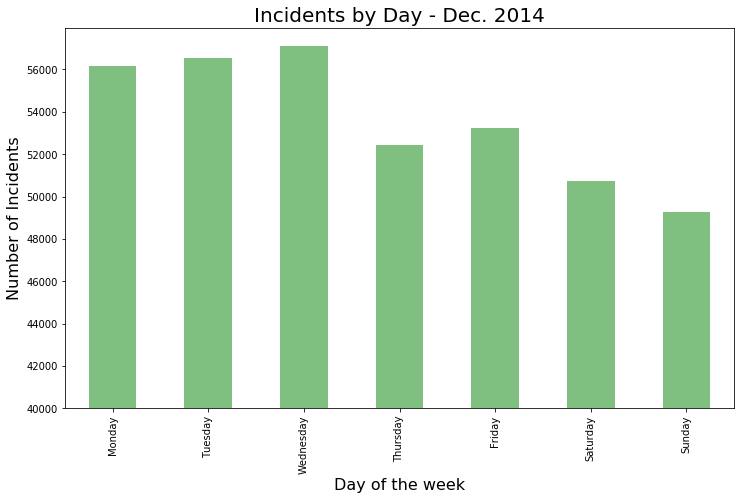

In [29]:
dec = data[data.month == 12]

# Number of incidents per day of the week
day_incidents = dec.groupby(dec['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Dec. 2014', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Quarter

In [30]:
q1 =[jan, feb, mar]
q2 = [apr, may, jun]
q3 = [jul, aug, sep]
q4 = [octo, nov, dec]

qt1 = pd.concat(q1)
qt2 = pd.concat(q2)
qt3 = pd.concat(q3)
qt4 = pd.concat(q4)

In [31]:
q1ct = qt1['comp_num'].count()
q2ct = qt2['comp_num'].count()
q3ct = qt3['comp_num'].count()
q4ct = qt4['comp_num'].count()

qtr_cts=[q1ct, q2ct, q3ct, q4ct]

qtr = ['Q1','Q2','Q3','Q4']

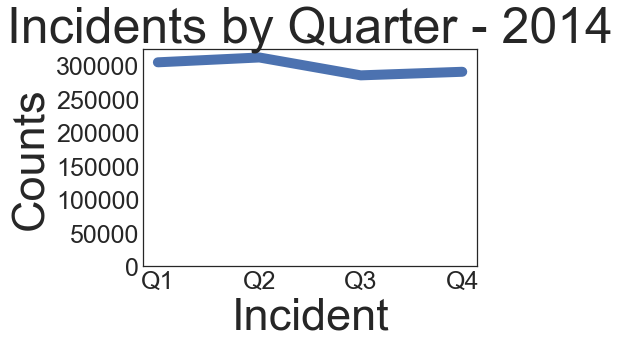

In [32]:
sns.set(rc={"lines.linewidth": 10.0})
plt.style.use('seaborn-white')

g = sns.lineplot(x = qtr ,y = qtr_cts, ci = None, alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)
plt.ylim(0,325000)
sns.set_style("white")

#sns.set(rc={'figure.figsize':(22, 22)})
plt.title("Incidents by Quarter - 2014", fontsize = 50)
plt.xlabel("Incident", fontsize = 45)
plt.ylabel("Counts", fontsize = 45)
plt.show()

## Incidents by Week

In [33]:
# Number of incidents per week
wk_incidents = data.groupby(data['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     26074
2     25479
3     25188
4     25547
5     24063
6     22094
7     21513
8     21367
9     22644
10    23657
11    24703
12    23666
13    24775
14    23352
15    24388
16    23927
17    24735
18    23624
19    23261
20    23464
21    23905
22    24458
23    25018
24    24304
25    23945
26    23511
27    21942
28    21866
29    20618
30    21012
31    21297
32    20658
33    21254
34    22519
35    22376
36    20885
37    23348
38    21739
39    22690
40    22165
41    21945
42    22443
43    22147
44    22858
45    22577
46    22757
47    24148
48    21135
49    23294
50    22693
51    23018
52    17113
Name: call_re, dtype: int64


In [34]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [35]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,26074
2,2,25479
3,3,25188
4,4,25547
5,5,24063
6,6,22094
7,7,21513
8,8,21367
9,9,22644
10,10,23657


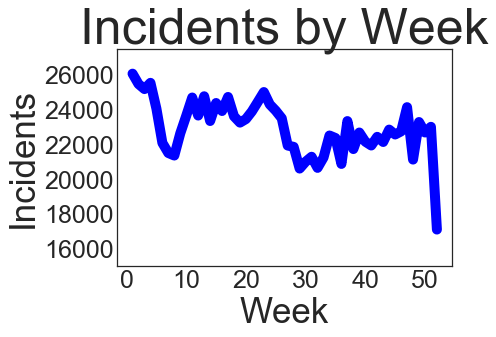

In [36]:
plt.ylim(15000, 27500)

sns.set(rc={"lines.linewidth": 10.0})

g = sns.lineplot(x = "Week",y = "Count", data = wk_ct, ci = None, color = 'blue', alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)

sns.set_style("white")
plt.style.use('seaborn-white')
plt.title("Incidents by Week", fontsize = 50)
plt.xlabel("Week", fontsize = 35)
plt.ylabel("Incidents", fontsize = 35)
plt.show()

Text(0, 0.5, 'Number of Incidents')

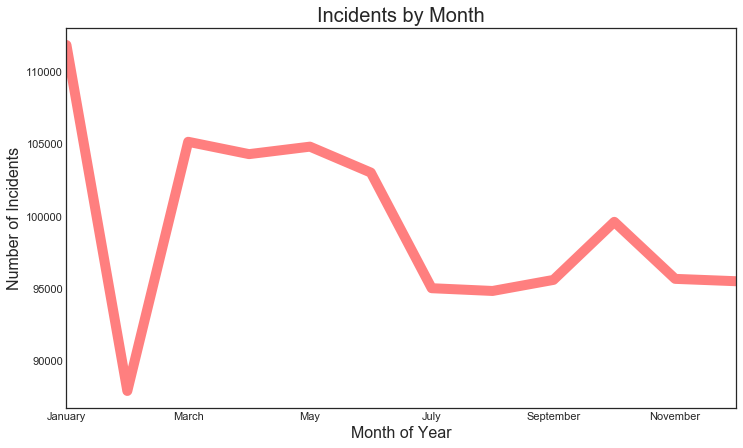

In [37]:
# Number of incidents per Month
mth_incidents = data.groupby(data['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,13)]

# plot incidents per month
Img2 = mth_incidents.plot(figsize=(12,7), color='red', alpha=0.5)

# title and x,y labels
plt.style.use('seaborn-white')
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents Reported

In [38]:
inc_ct = data.tc_desc.value_counts()

In [39]:

inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [40]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

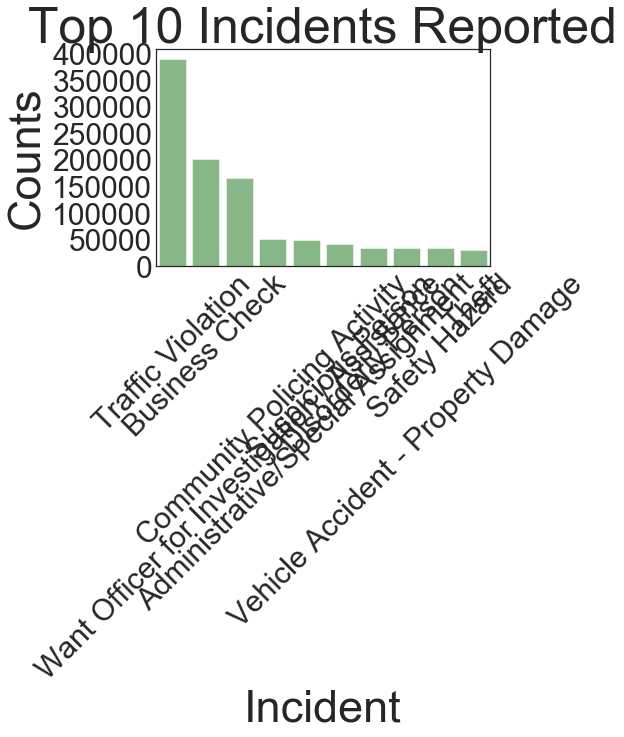

In [41]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = t25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 30)
plt.yticks(rotation=0, fontsize = 30)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Top 10 Incidents Reported", fontsize = 50)
plt.xlabel("Incident", fontsize = 45)
plt.ylabel("Counts", fontsize = 45)
plt.show()

In [42]:
# Smallest x number of incidents

S25 = inc_cts.nsmallest(10,['Count'])

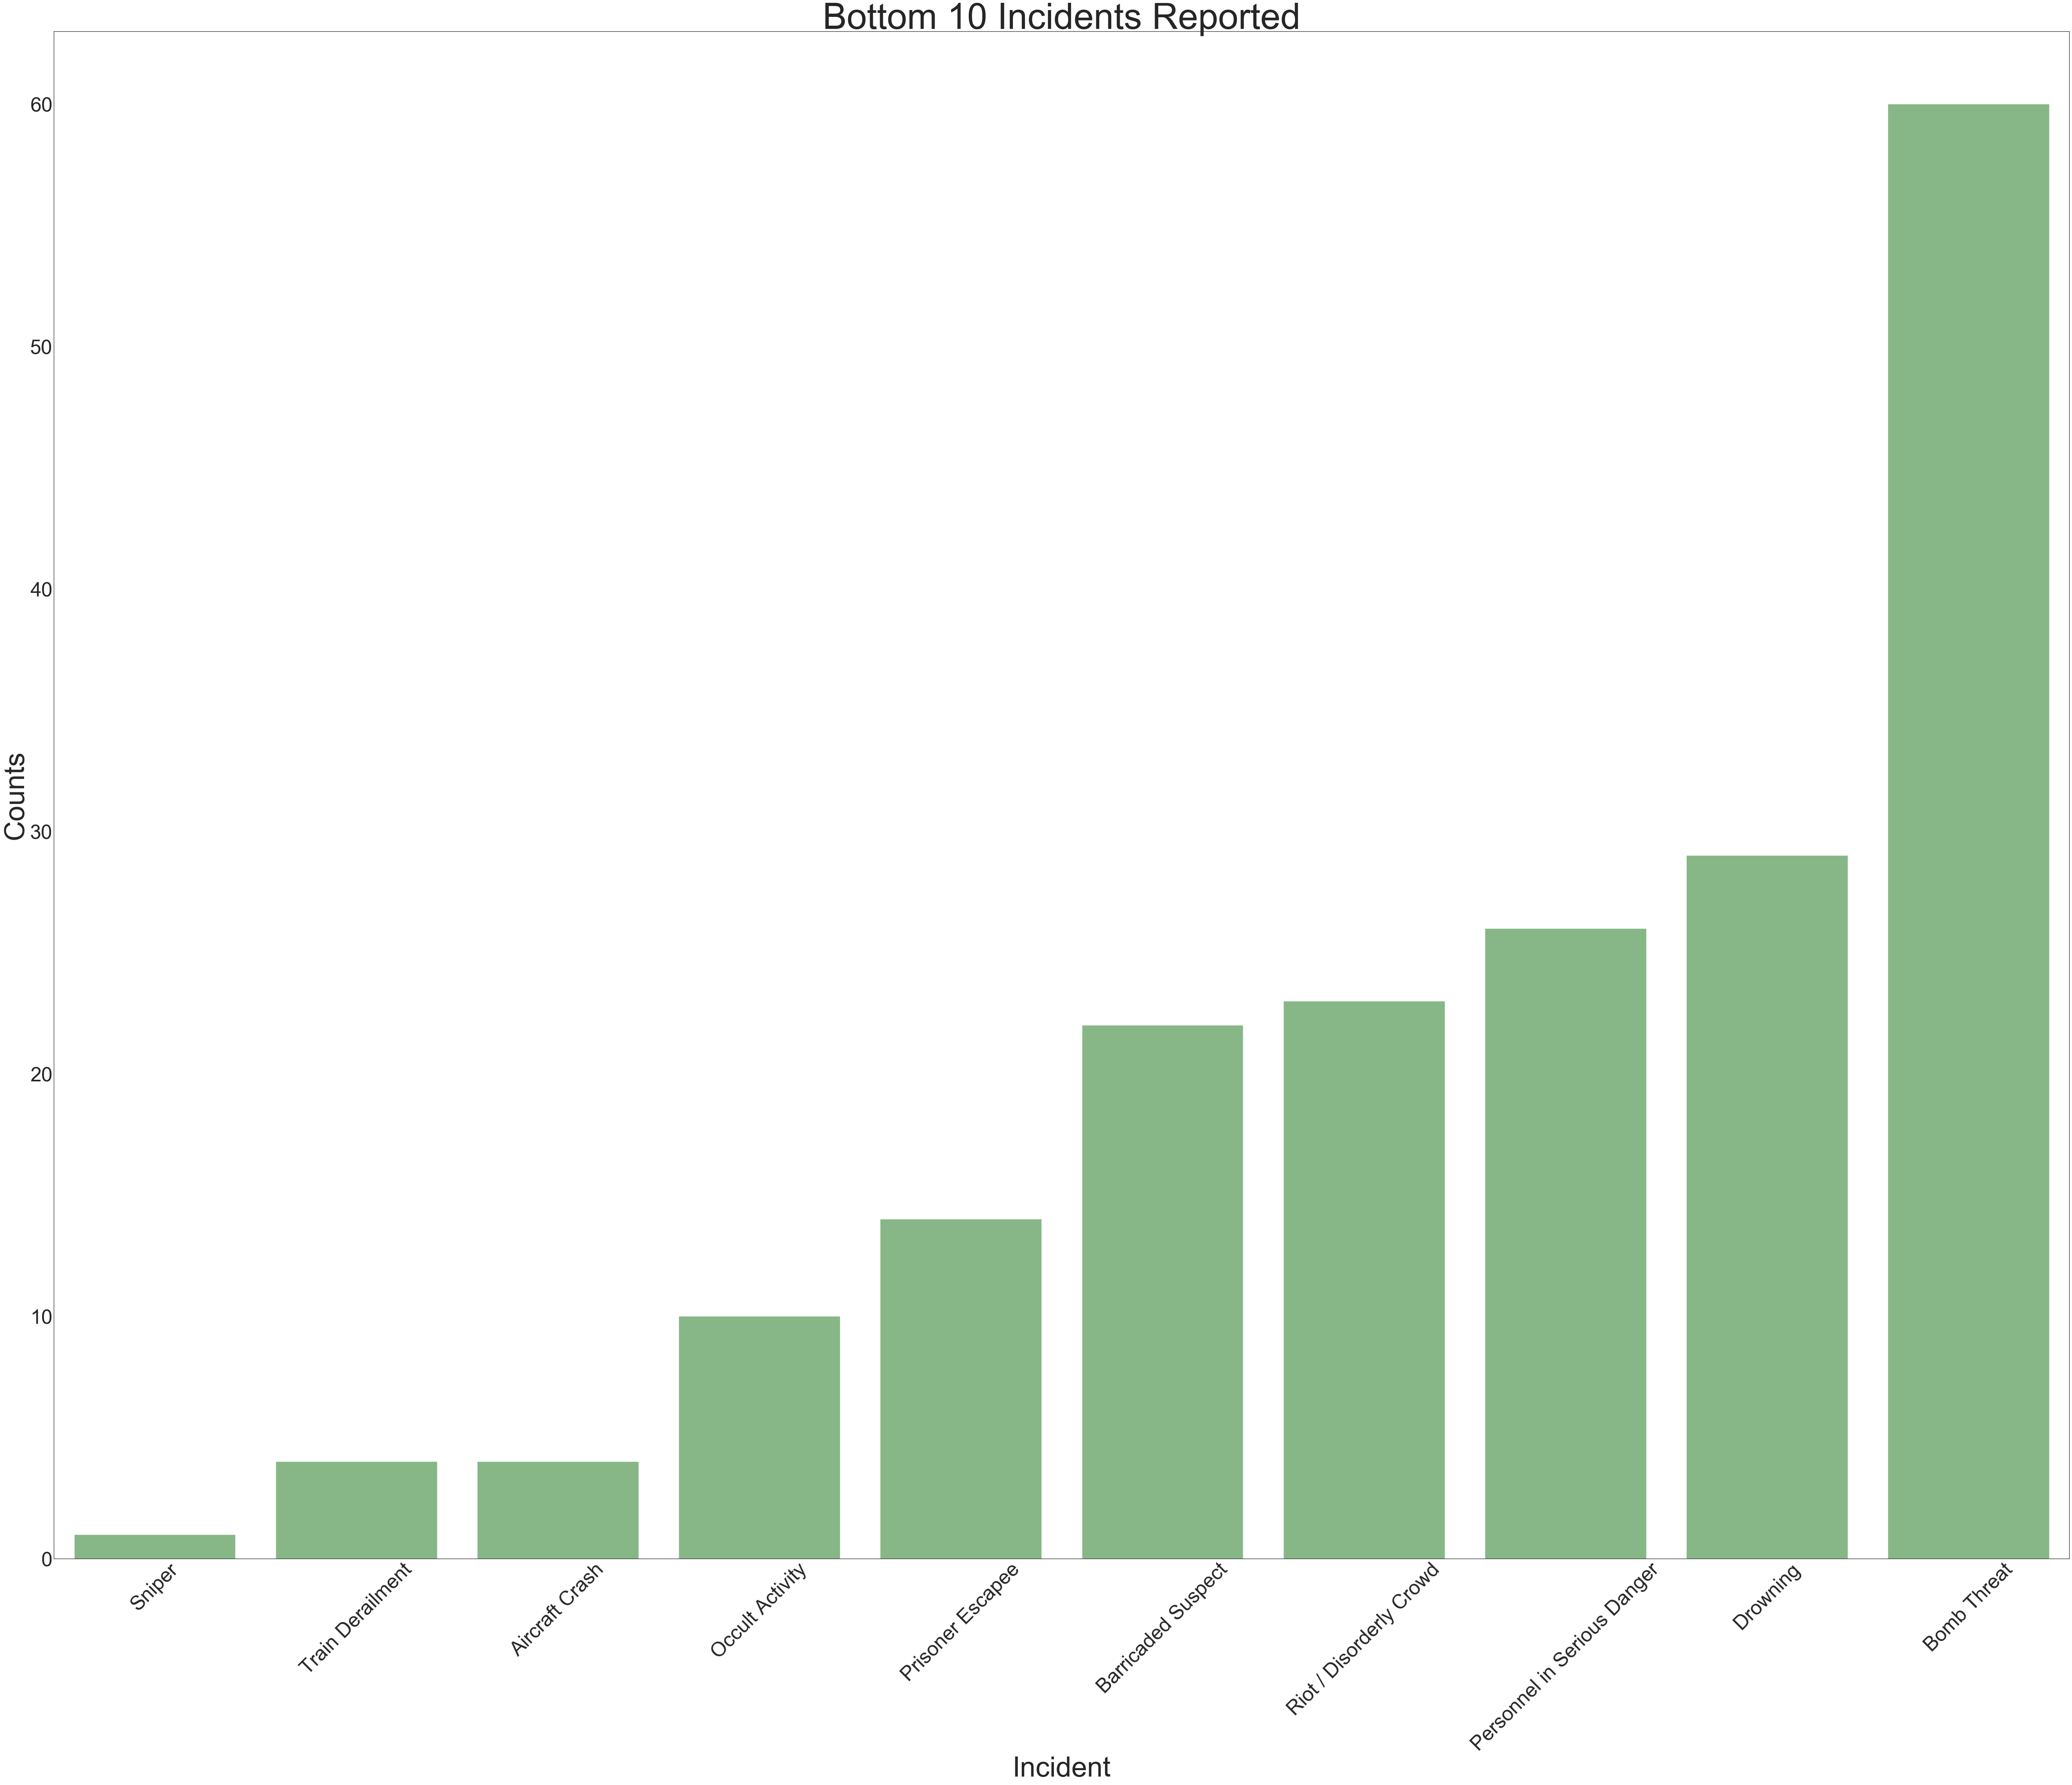

In [43]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = S25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

## Incidents by Zip Code

In [44]:
zip_ct = data.zip.value_counts()

In [45]:
zip_ct.shape

(38,)

In [46]:
zip_cts = pd.DataFrame(list(zip_ct.items()))
zip_cts.columns = ['zip', 'count']

In [47]:
zip_cts.head()

,zip,count
0,37203.0,75796
1,37211.0,69318
2,37207.0,64712
3,37115.0,54763
4,37209.0,50895


In [48]:
# Avg Number of Incidents 

avg_per_zip = zip_cts['count'].mean()
print(avg_per_zip)

20714.947368421053


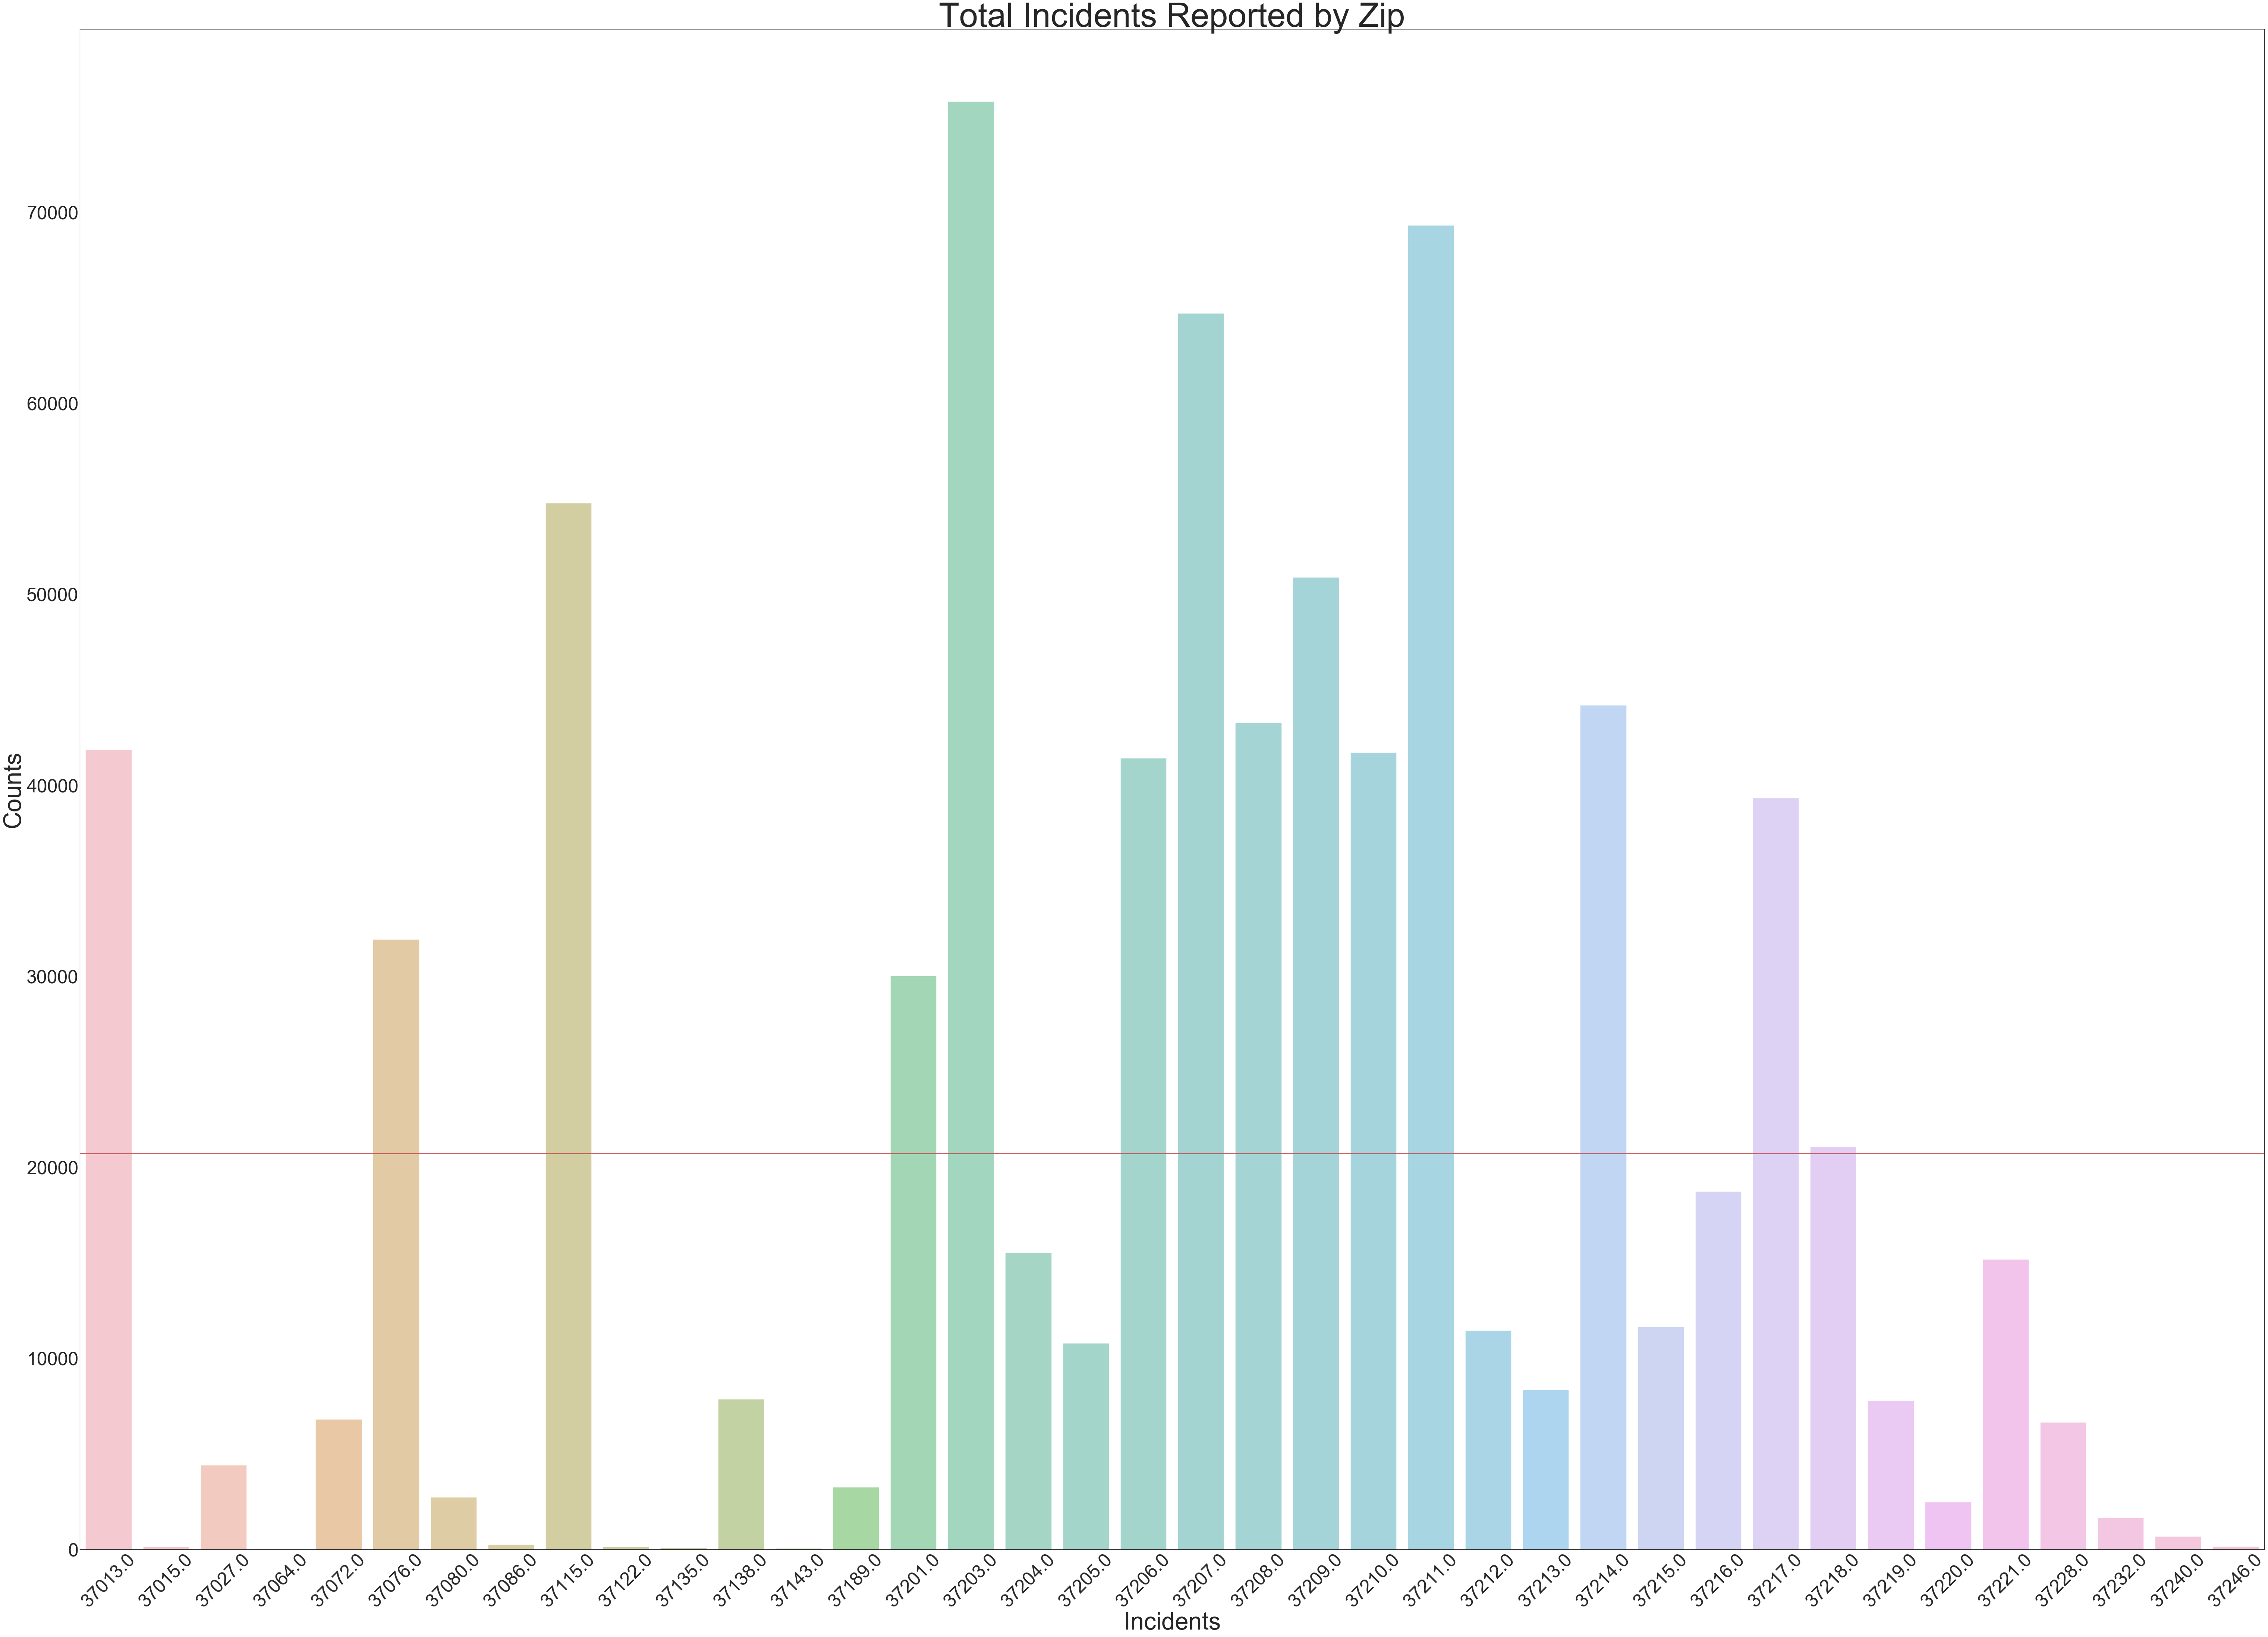

In [49]:
sns.set_style("white")
plt.style.use('seaborn-white')


g = sns.barplot(x = "zip",y = "count", data = zip_cts, ci = None, alpha = 0.5)
line1 = plt.axhline(linewidth=2, color='r', y = avg_per_zip, label = "avg.")
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Total Incidents Reported by Zip", fontsize = 90)
plt.xlabel("Incidents", fontsize = 65)
plt.ylabel("Counts", fontsize = 65)
plt.show()

### Import Zip Code Populations

In [59]:
pop_zips = pd.read_csv('./data/tn_zip_population.csv')

In [60]:
pop_zips.head()

,Unnamed: 0,zip_code,y-2016,y-2015,y-2014,y-2013,y-2012,y-2011,y-2010,aggregate
0,11901,37010,5198,5648,5568,5633,5751,5035,4679,37512
1,11902,37012,2424,2637,2766,2477,2436,2355,2292,17387
2,11903,37013,93372,90073,86261,81944,79903,76983,78406,586942
3,11904,37014,2663,2500,2410,2130,1746,1812,1855,15116
4,11905,37015,17996,18361,17846,17400,16985,16976,17184,122748


#### Merge zip_cts to pop_zips

In [61]:
zips_all = zip_cts.merge(pop_zips, how = 'left', left_on = 'zip', right_on = 'zip_code')

In [62]:
# only focus on this year's info

zips_all = zips_all.drop(columns = ['Unnamed: 0','y-2016','y-2015','y-2013','y-2012','y-2011','y-2010','aggregate','zip_code'])

In [63]:
# rename remaining columns for convenience

zips_all = zips_all.rename(index={'zip': 'zip_code', 'count': 'inc_cts', 'y-2014': 'population'})

In [64]:
zips_all.head()

,zip,count,y-2014
0,37203.0,75796,11767.0
1,37211.0,69318,77993.0
2,37207.0,64712,34257.0
3,37115.0,54763,37941.0
4,37209.0,50895,36053.0


#### Calculate crime rate by zipcode

In [65]:
zips_all['crime_rate'] = ((zips_all['count']/zips_all['y-2014'])*100000)

In [66]:
zips_all.head()

,zip,count,y-2014,crime_rate
0,37203.0,75796,11767.0,644140.392623
1,37211.0,69318,77993.0,88877.206929
2,37207.0,64712,34257.0,188901.538372
3,37115.0,54763,37941.0,144337.260483
4,37209.0,50895,36053.0,141167.170554


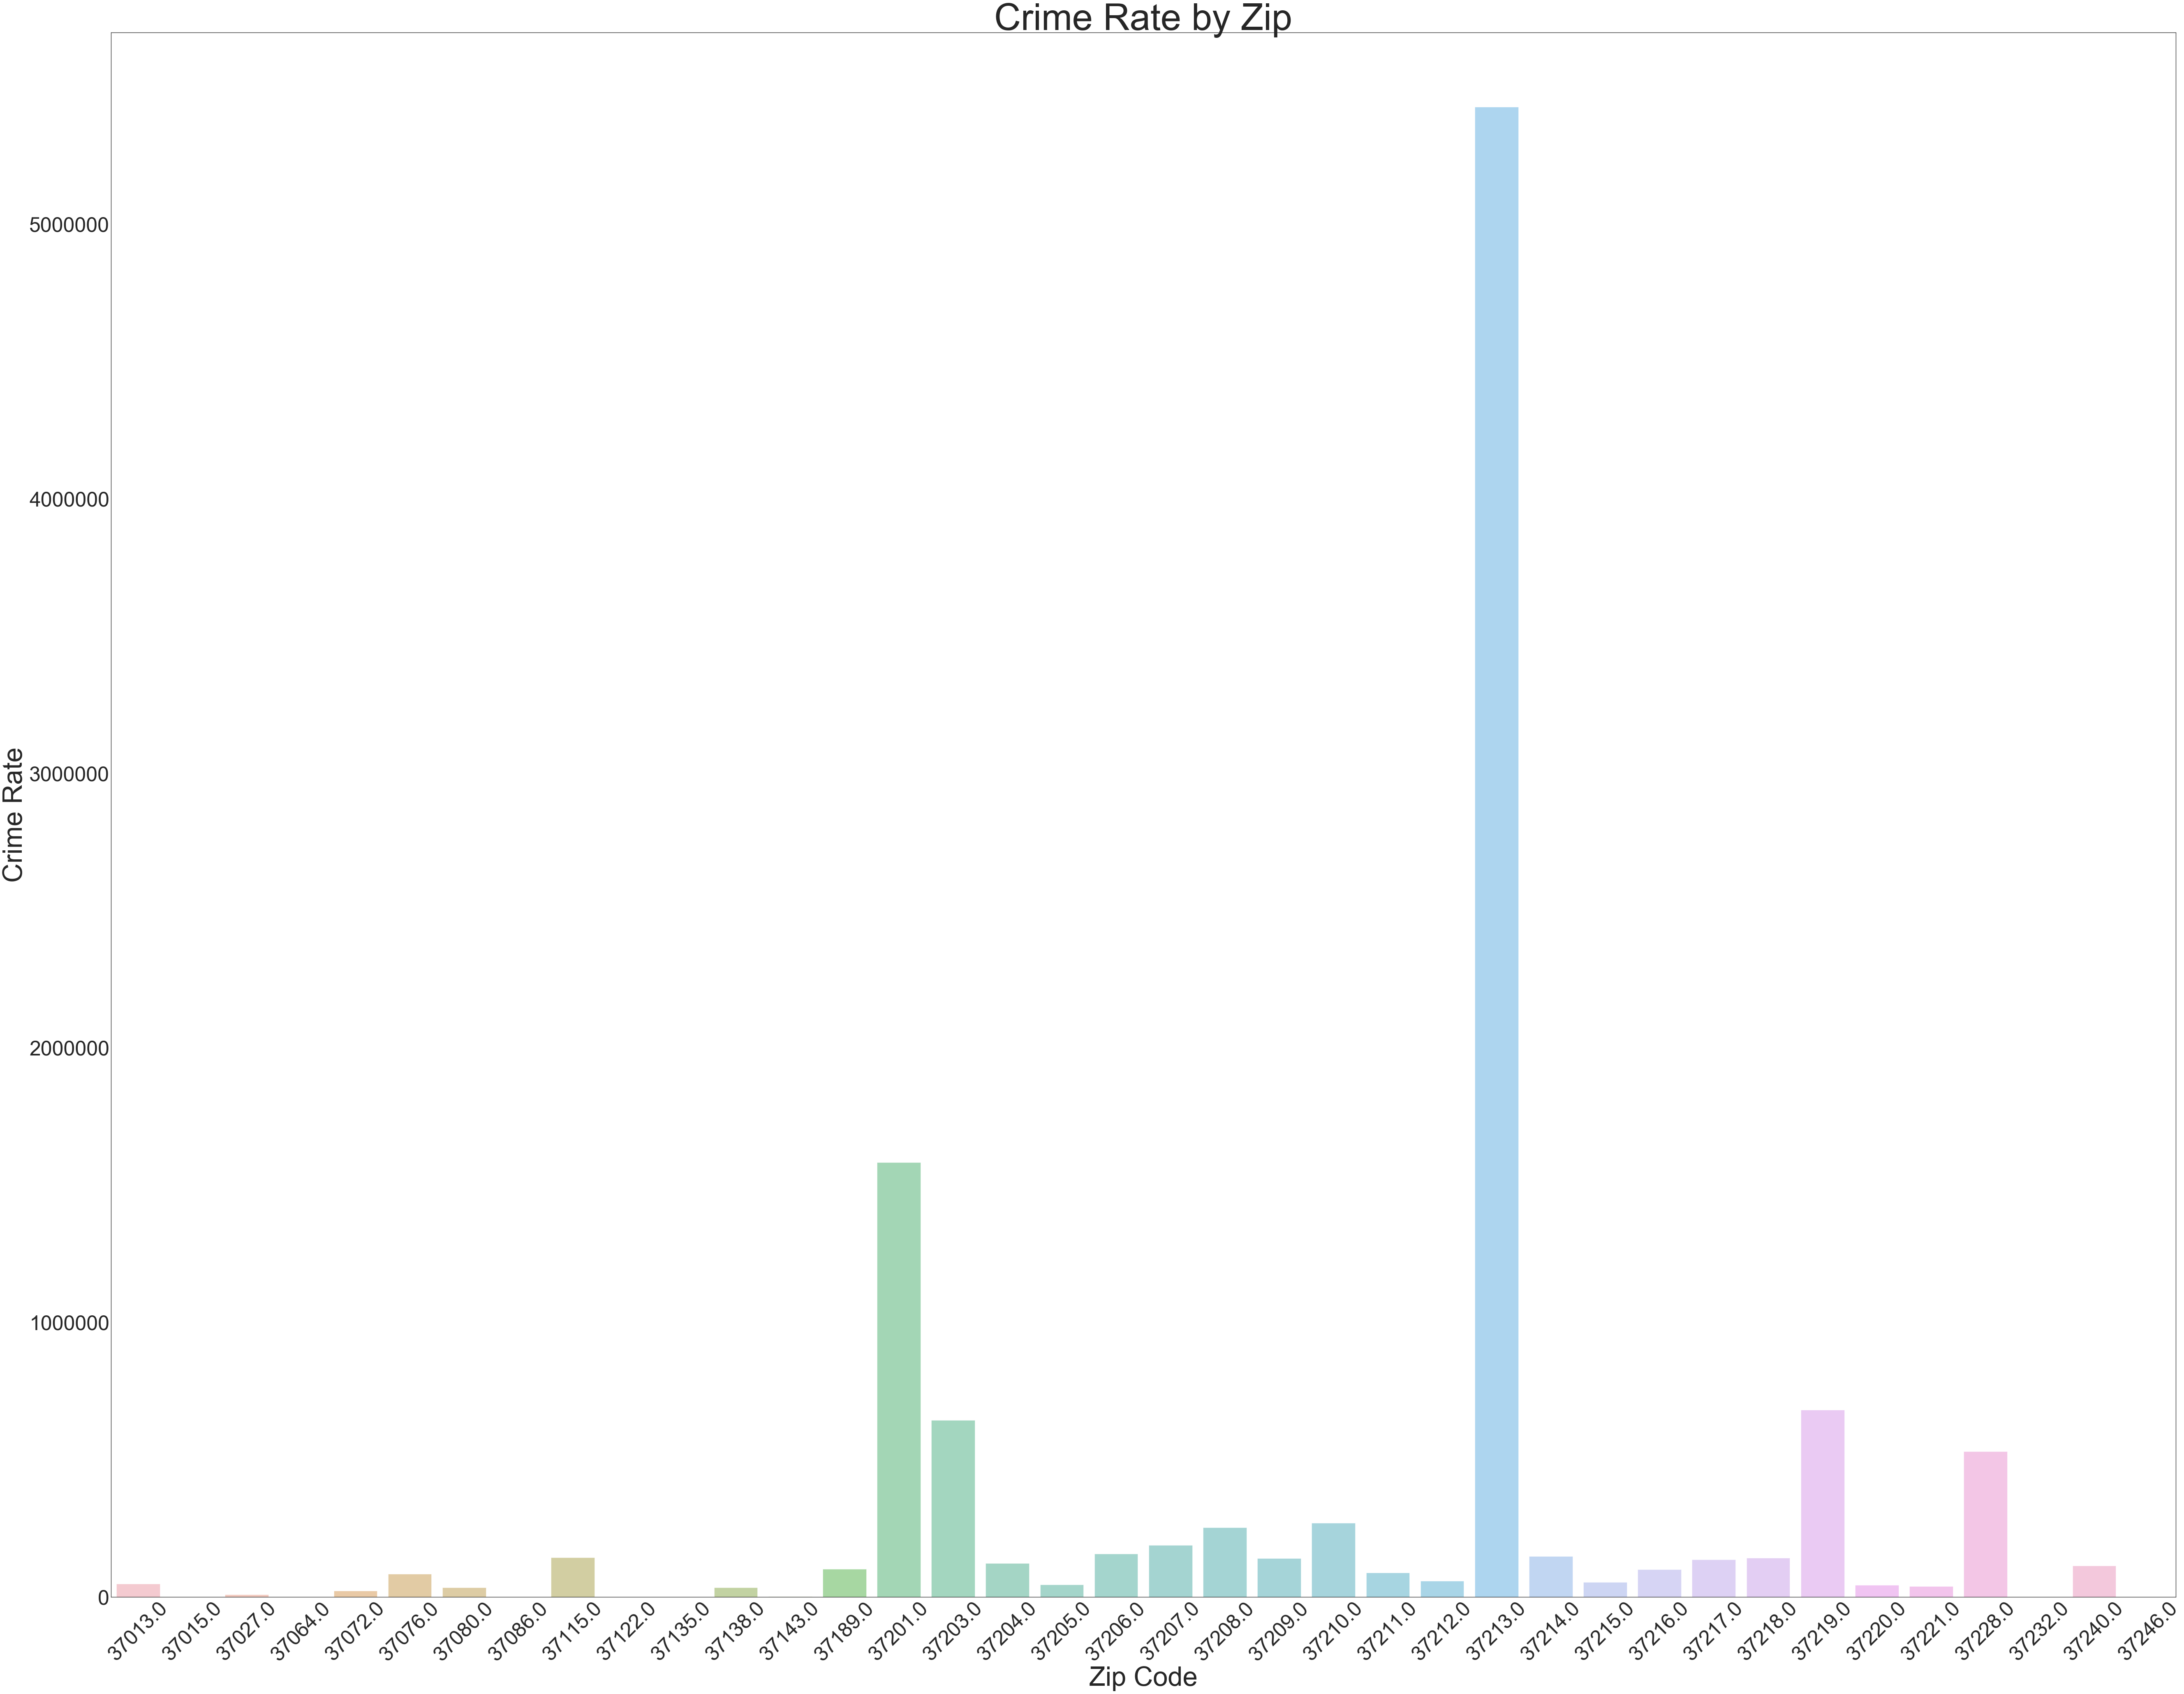

In [67]:
sns.set_style("white")
plt.style.use('seaborn-white')


g = sns.barplot(x = "zip",y = "crime_rate", data = zips_all, ci = None, alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Crime Rate by Zip", fontsize = 90)
plt.xlabel("Zip Code", fontsize = 65)
plt.ylabel("Crime Rate", fontsize = 65)
plt.show()